# Quick Introduction to Python programming
*Python* (https://www.python.org/) is a general purpose programming language commonly used for data science and machine learning

## Printing information to the screen

### Print basics
The *print()* function is used to output information to the screen

In [3]:
print('hello world!')

hello world!


We can output multiple values using *print* by separating them by commas.

In [4]:
x = 3 # assign the value of 3 to 'x'
print('The value of x is:', x)

The value of x is: 3


### More printing options

Additional values that can passed to the *print* function include:
- *sep*: used to separate each objects
- *end*: added to the end of the output

In [5]:
print('a', 'b', 'c', sep = '-')

a-b-c


In [6]:
# values are separated by spaces by default
print('a', 'b', 'c')

a b c


In [7]:
# do not include a space between values
print('a', 'b', 'c', sep = '')

abc


In [8]:
# each print statement ends with a new line by default
print("line 1")
print("line 2")

line 1
line 2


In [9]:
# by changing 'end', we can continue to output to the same line
print("line 1", end = " ")
print("line 2")

line 1 line 2


## Using variables to store information

A *variable* is used to store values, and can take various types. The *primitive* types (which store single values) are below:
- a *int* stores an integer value
- a *float* stores a decimal value
- a *string* stores a sequence of characters
 
To assign a value to a primitive variable type in Python, use the format
`variable_name = value`

In [10]:
welcome = 'hello' # store the string 'hello' in the variable 'welcome'

Any notebook cell that ends with a variable or an expression will output the corresponding value to the notebook

In [11]:
num1 = 4   # store the integer 4 in the variable 'num1'
num2 = 5   # store the integer 5 in the variable 'num2'
num1 + num2

9

*Non-primitive* types store a collection of values. One such type is a *list*, which stores multiple objects (which do *not* have to be the same type). To create a new list, use one of hte following:

- Create an *empty* list using x = `[]` or x = `list()`
- Create a list of objects using `x = [val1, val2, ...]`

In [12]:
words = ['hello', 'python', 'eastern'] # a list of words
words

['hello', 'python', 'eastern']

## Iterating over values in a list
Often in programs we need to do something like the following:

`for each element in a list :
    do something with the element`

This is straightforward in Python, using a *for* loop as shown in the code below.

In [13]:
print("The words are:")
for w in words :
    print(' ', w)

The words are:
  hello
  python
  eastern


## Natural language processing preview
After learning fundamental programming concepts, and getting familiar with Python, we will use Python for data science and machine intelligence. The code below is a preview for our unit on *natural language processing*, where computers are used to analyze and extract meaningful information from text.

We first download the text of L. Frank Baum's *The Wonderful Wizard of Oz*, from [Project Gutenberg](http://www.gutenberg.org/).

In [14]:
# connect to the web page and download using the 'requests' module
import requests
req = requests.get('https://www.gutenberg.org/files/55/55.txt')

# check whether download was successful
if req.status_code == 200 :
    print(req.text)
else :
    print("Download unsuccessful. Try again.")

The Project Gutenberg EBook of The Wonderful Wizard of Oz, by L. Frank Baum

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Wonderful Wizard of Oz

Author: L. Frank Baum

Release Date: July 1, 2008 [EBook #55]

Language: English

Character set encoding: ASCII

*** START OF THIS PROJECT GUTENBERG EBOOK THE WONDERFUL WIZARD OF OZ ***















The Wonderful Wizard of Oz


by

L. Frank Baum



 Contents

       Introduction
   1.  The Cyclone
   2.  The Council with the Munchkins
   3.  How Dorothy Saved the Scarecrow
   4.  The Road Through the Forest
   5.  The Rescue of the Tin Woodman
   6.  The Cowardly Lion
   7.  The Journey to the Great Oz
   8.  The Deadly Poppy Field
   9.  The Queen of the Field Mice
  10.  The Guardian of the Gates
  11.  The Emerald City of Oz

In [15]:
# process the text using the 'nlp' function from 'spacy'
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(req.text)

In [16]:
# display the text and label the entities
from spacy import displacy
displacy.render(doc, style="ent")

In [17]:
# create a list of tokens (words) that spacy identifies as 'PERSON'
people = [ent.text.lower().strip() for ent in doc.ents if ent.label_ == 'PERSON']

# count the number of occurences for each 'person'
from collections import Counter
people_counts = Counter(people)

for person, count in people_counts.most_common(10) :
    print(person, ': ', count, sep = '')

dorothy: 359
lion: 113
scarecrow: 87
woodman: 53
toto: 43
oz: 33
project gutenberg-tm: 31
witch: 24
wizard: 19
munchkins: 14


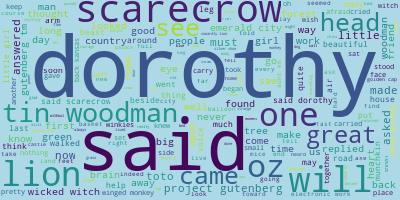

In [18]:
# generate a word cloud from all words in The Wizard of Oz (however common words such as 'the' and 'a' are removed
# the size of each word corresponds to its frequency
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightblue').generate(doc.text.lower())
wordcloud.to_image()